# Sales Funnel Efficiency

### Imports

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### EDA

In [3]:
# Import data
segmentData = pd.read_excel('2017 08 take home data.xlsx')

In [4]:
segmentData = segmentData[segmentData.opportunity_stage != 'Closed - Duplicate Record']

In [5]:
segmentData['opportunity_month_year'] = segmentData.lead_converted_date.dt.to_period('M')
segmentData['discovery_month_year'] = segmentData.opportunity_qualified_date.dt.to_period('M')
segmentData['lead_month_year'] = segmentData.lead_created_date.dt.to_period('M')

In [6]:
segmentData.head()

,lead_id,lead_owner_id,lead_created_date,lead_converted_date,lead_fit_score,lead_mql_status,lead_source,lead_industry,lead_capital_raised_amount,lead_location_state,...,opportunity_amount,opportunity_qualified_date,opportunity_owner_id,opportunity_age,opportunity_source,opportunity_created_date,opportunity_close_date,opportunity_month_year,discovery_month_year,lead_month_year
0,00Q31000015bfgnEAA,005i0000004OgYcAAK,2015-09-29,2015-10-01,NaN,1.0,Web,NaN,0.0,New York,...,0.0,NaN,005i0000005r84mAAA,560.0,Inbound,2015-10-01,2016-12-31,2015-10,NaT,2015-09
1,00Qi0000012aRscEAE,005i0000001G13xAAC,2015-07-14,2015-07-14,NaN,1.0,Web,NaN,0.0,Pennsylvania,...,0.0,NaN,00531000006licXAAQ,638.0,(none),2015-07-14,2016-11-16,2015-07,NaT,2015-07
2,00Qi000000GTI5LEAX,005i0000001FgRuAAK,2014-03-19,2014-03-21,NaN,1.0,Web,NaN,0.0,NaN,...,0.0,NaN,005i0000004zDbeAAE,1118.0,Email to Signup,2014-03-22,2016-11-30,2014-03,NaT,2014-03
3,00Qi000000RzhgtEAB,005i0000003LoikAAC,2014-07-14,2014-07-14,NaN,1.0,Web,NaN,0.0,NaN,...,0.0,NaN,005i00000066UwCAAU,1004.0,Inbound,2014-07-14,2016-12-12,2014-07,NaT,2014-07
4,00Qi000000ab30YEAQ,005i0000003LoikAAC,2014-10-07,2014-10-07,NaN,1.0,Web,NaN,0.0,NaN,...,0.0,NaN,005i0000005r84mAAA,918.0,(none),2014-10-07,2016-08-22,2014-10,NaT,2014-10


In [7]:
segmentData.count()

lead_id                          7989
lead_owner_id                    7989
lead_created_date                7989
lead_converted_date               870
lead_fit_score                   7631
lead_mql_status                  7565
lead_source                      7949
lead_industry                    5336
lead_capital_raised_amount       7989
lead_location_state              3729
lead_location_country            5032
lead_title                       4539
lead_number_of_employees         7565
opportunity_sales_engineer_id     325
opportunity_use_case               71
opportunity_stage                 693
opportunity_amount                693
opportunity_qualified_date        251
opportunity_owner_id              693
opportunity_age                   693
opportunity_source                693
opportunity_created_date          693
opportunity_close_date            693
opportunity_month_year            870
discovery_month_year              251
lead_month_year                  7989
dtype: int64

In [8]:
len(segmentData.opportunity_owner_id.unique())

19

In [9]:
segmentData.lead_source.value_counts()

Web                      4034
Clearbit                 3477
Outbound                  173
Marketing Event           140
Content Marketing          61
ZenProspect                26
Trade Show                 14
Datanyze                    6
Other                       5
Personal Referral           3
Prospecting                 3
Conference                  2
Purchased List Upload       1
★★★★★                       1
Zapier Zendesk Lead         1
Social Selling              1
Sendbloom                   1
Name: lead_source, dtype: int64

In [10]:
segmentData.opportunity_source.value_counts()

Inbound                         357
Outbound - Mass Market          167
Email to Signup                  82
(none)                           27
Live Event/Trade Show            22
Outbound - Targeted              19
Cold Lead or Prior Lost Deal     10
Upgrade from Self-Service         5
Growth - Outbound                 2
Personal Referral                 1
Growth - Existing Customer        1
Name: opportunity_source, dtype: int64

In [11]:
segmentData.opportunity_amount.describe()

count       693.00000
mean      15922.81443
std       10154.30856
min           0.00000
25%       14000.00000
50%       14000.00000
75%       14000.00000
max      100000.00000
Name: opportunity_amount, dtype: float64

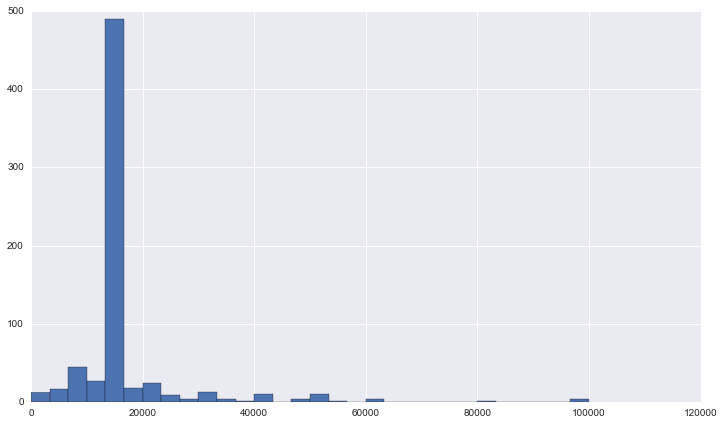

In [12]:
segmentData.opportunity_amount.hist(bins=30, figsize=(12,7));

In [13]:
def oppAmount(x):
    p = ''
    if x.opportunity_amount >= 20000: p='Large'
    elif x.opportunity_amount <= 10000: p='Small'
    else: p = 'Medium'
    return p

In [14]:
segmentData['opportunity_size'] = segmentData.apply(oppAmount, axis=1)

In [15]:
segmentData.opportunity_size.value_counts()

Medium    7822
Large       85
Small       82
Name: opportunity_size, dtype: int64

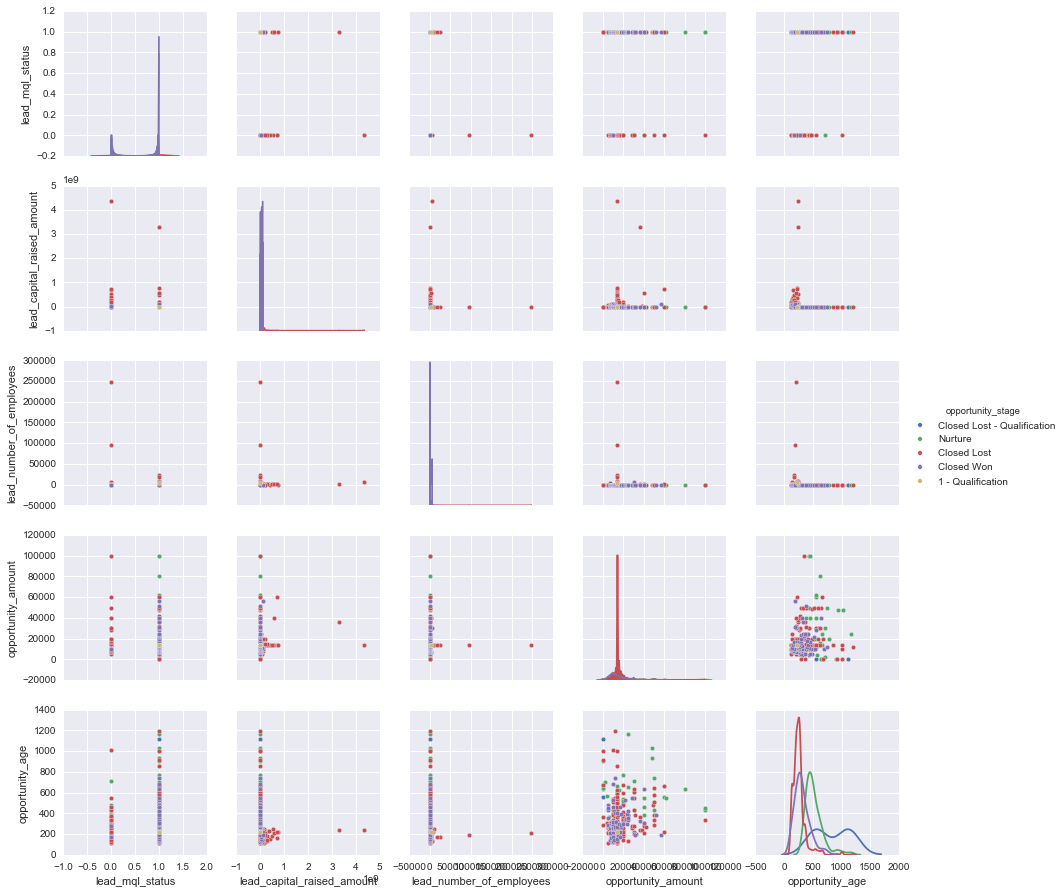

In [16]:
sns.pairplot(segmentData, diag_kind="kde", hue="opportunity_stage");

# Lead Source

## $ Closed Per Month by Lead Source

In [17]:
def stageWonMap(x):
    p = 0
    if x.opportunity_stage == 'Closed Won': p = x.opportunity_amount
    return p

In [18]:
segmentData['opportunity_won_amount'] = segmentData.apply(stageWonMap, axis=1)

In [19]:
leadDollarsClosedPerMonth = segmentData[['opportunity_won_amount', 'opportunity_month_year', 'lead_source']].pivot_table(
                                values='opportunity_won_amount',
                                index='opportunity_month_year',
                                columns='lead_source', aggfunc='sum')

In [20]:
leadDollarsClosedPerMonth.tail()

lead_source,Clearbit,Conference,Content Marketing,Datanyze,Marketing Event,Other,Outbound,Personal Referral,Prospecting,Purchased List Upload,Sendbloom,Trade Show,Web,Zapier Zendesk Lead,ZenProspect
opportunity_month_year,,,,,,,,,,,,,,,
2016-09,0.0,NaN,0.0,NaN,16800.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,76800.0,NaN,0.0
2016-10,0.0,0.0,NaN,NaN,31200.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,95600.0,NaN,9600.0
2016-11,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40512.0,NaN,0.0
2016-12,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,28320.0,NaN,0.0
2017-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


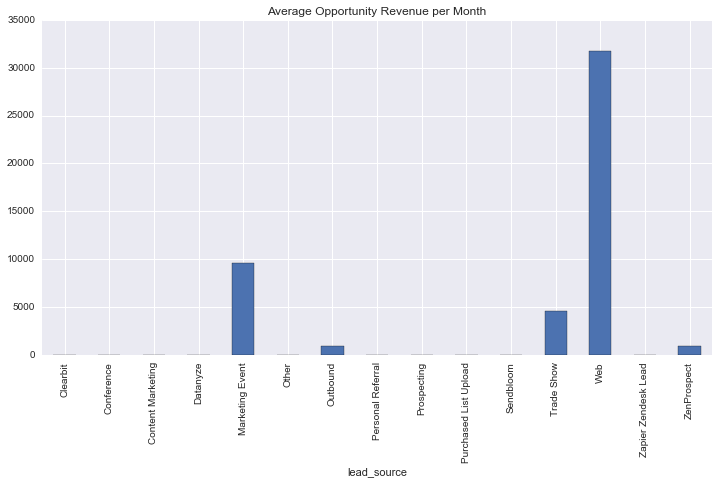

In [21]:
leadDollarsClosedPerMonth.mean().plot.bar(figsize={12,6})
plt.title('Average Opportunity Revenue per Month');

In [22]:
# Number of leads per month per source
leadPerMonth = segmentData[['opportunity_month_year', 'lead_source']].pivot_table(
                                index='opportunity_month_year',
                                columns='lead_source', aggfunc=len)

In [23]:
leadPerMonth.tail()

lead_source,Clearbit,Conference,Content Marketing,Datanyze,Marketing Event,Other,Outbound,Personal Referral,Prospecting,Purchased List Upload,Sendbloom,Trade Show,Web,Zapier Zendesk Lead,ZenProspect
opportunity_month_year,,,,,,,,,,,,,,,
2016-09,16.0,NaN,1.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,1.0,90.0,NaN,1.0
2016-10,5.0,1.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,57.0,NaN,1.0
2016-11,7.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,NaN,67.0,NaN,3.0
2016-12,3.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,2.0
2017-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


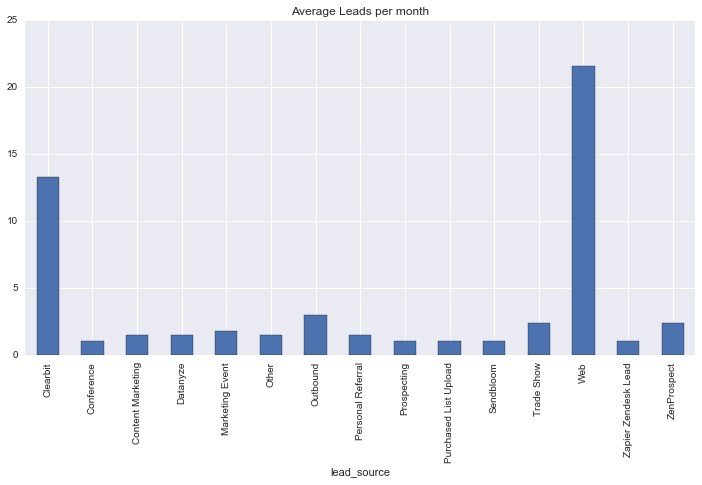

In [24]:
leadPerMonth.mean().plot.bar(figsize={12,6})
plt.title('Average Leads per month');

## Conversion Rate

### Lead to Opportuntity

In [25]:
def oppConversion(x):
    p = ''
    if type(x.lead_converted_date) == pd.tslib.Timestamp: p = 'convertedLead'
    return p

In [26]:
segmentData['opportunity_conversion'] = segmentData.apply(oppConversion, axis=1)

In [27]:
segmentData.opportunity_conversion.value_counts()

                 7119
convertedLead     870
Name: opportunity_conversion, dtype: int64

In [28]:
leadConvDataGrouped = segmentData.groupby(['lead_source', 'opportunity_conversion']).opportunity_conversion.count()
leadConvpct = leadConvDataGrouped.groupby(level=[0]).apply(lambda x: 100* x / float(x.sum())); 

In [29]:
leadConvpct = leadConvpct.filter(like='convertedLead').rename('leadConversionPercent').to_frame().reset_index()

In [30]:
leadConvpct.tail()

,lead_source,opportunity_conversion,leadConversionPercent
10,Sendbloom,convertedLead,100.000000
11,Trade Show,convertedLead,85.714286
12,Web,convertedLead,16.559246
13,Zapier Zendesk Lead,convertedLead,100.000000
14,ZenProspect,convertedLead,100.000000


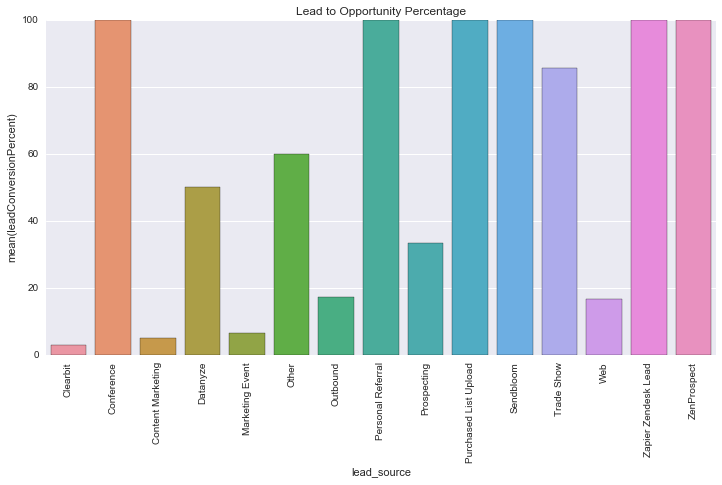

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='lead_source', y= 'leadConversionPercent', data=leadConvpct)
plt.xticks(rotation=90)
plt.title('Lead to Opportunity Percentage');

### Qualification to Discovery

In [32]:
qualification = segmentData[segmentData['opportunity_conversion'] == 'convertedLead']

In [33]:
def qualConversion(x):
    p = ''
    if type(x.opportunity_qualified_date) == pd.tslib.Timestamp: p = 'convertedQual'
    return p

In [34]:
qualification['opportunity_qualified_date'] = pd.to_datetime(qualification.opportunity_qualified_date)

In [35]:
qualification['qual_conversion'] = qualification.apply(qualConversion, axis=1)

In [36]:
qualification.qual_conversion.value_counts()

                 619
convertedQual    251
Name: qual_conversion, dtype: int64

In [37]:
qualConvDataGrouped = qualification.groupby(['lead_source', 'qual_conversion']).qual_conversion.count()
qualConvpct = qualConvDataGrouped.groupby(level=[0]).apply(lambda x: 100* x / float(x.sum())); 

In [38]:
qualConvpct = qualConvpct.filter(like='convertedQual').rename('qualConversionPercent').to_frame().reset_index()

In [39]:
qualConvpct.head()

,lead_source,qual_conversion,qualConversionPercent
0,Clearbit,convertedQual,26.415094
1,Content Marketing,convertedQual,33.333333
2,Datanyze,convertedQual,66.666667
3,Marketing Event,convertedQual,44.444444
4,Other,convertedQual,66.666667


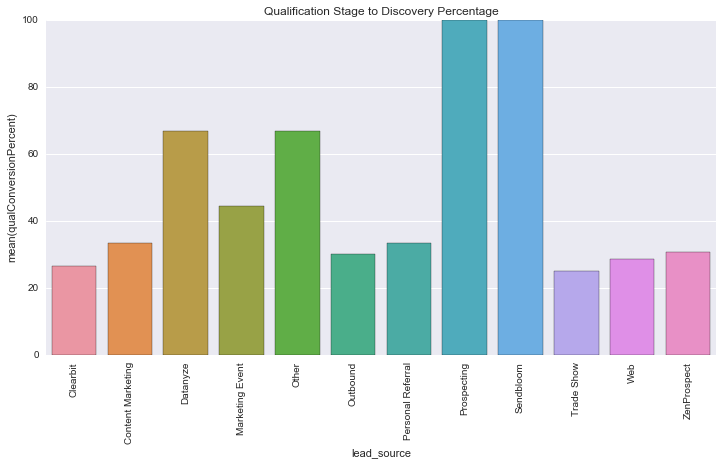

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='lead_source', y= 'qualConversionPercent', data=qualConvpct)
plt.xticks(rotation=90)
plt.title('Qualification Stage to Discovery Percentage');

### Discovery to Closed Won

In [42]:
discovery = qualification[qualification['qual_conversion'] == 'convertedQual']

In [43]:
discGrouped = discovery.groupby(['lead_source', 'opportunity_stage']).opportunity_stage.count()
discConvpct = discGrouped.groupby(level=[0]).apply(lambda x: 100* x / float(x.sum())); 

In [44]:
discGrouped.head(10)

lead_source        opportunity_stage
Clearbit           Closed Lost          28
Content Marketing  Closed Lost           1
Datanyze           Closed Lost           1
                   Nurture               1
Marketing Event    Closed Lost           1
                   Closed Won            3
Other              Nurture               2
Outbound           Closed Lost           7
                   Closed Won            1
                   Nurture               1
Name: opportunity_stage, dtype: int64

In [45]:
discConvpct = discConvpct.filter(like='Closed Won').rename('discConversionPercent').to_frame().reset_index()

In [46]:
discConvpct.head()

,lead_source,opportunity_stage,discConversionPercent
0,Marketing Event,Closed Won,75.000000
1,Outbound,Closed Won,11.111111
2,Trade Show,Closed Won,33.333333
3,Web,Closed Won,32.631579
4,ZenProspect,Closed Won,12.500000


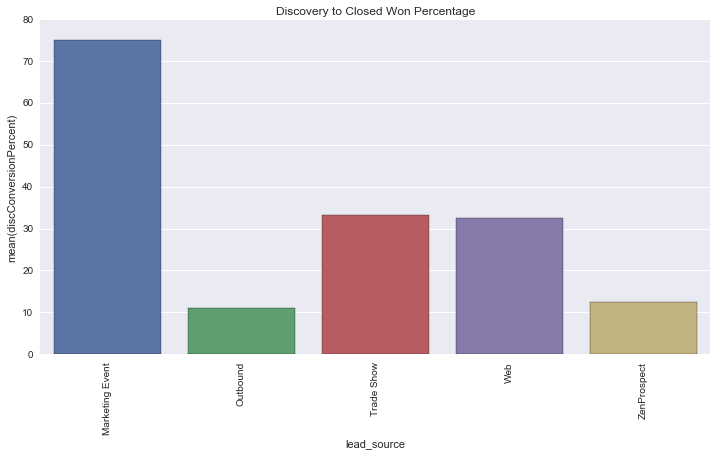

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x='lead_source', y= 'discConversionPercent', data=discConvpct)
plt.xticks(rotation=90)
plt.title('Discovery to Closed Won Percentage');

### MQL effect on opportunity stage

In [49]:
# sns.(x='opportunity_month_year', hue='opportunity_stage', data=segmentData)
oppstage = segmentData[['lead_mql_status', 'opportunity_month_year', 'opportunity_stage']].pivot_table(
                index=['lead_mql_status', 'opportunity_month_year'], 
                columns='opportunity_stage', aggfunc=len, fill_value=0
            )

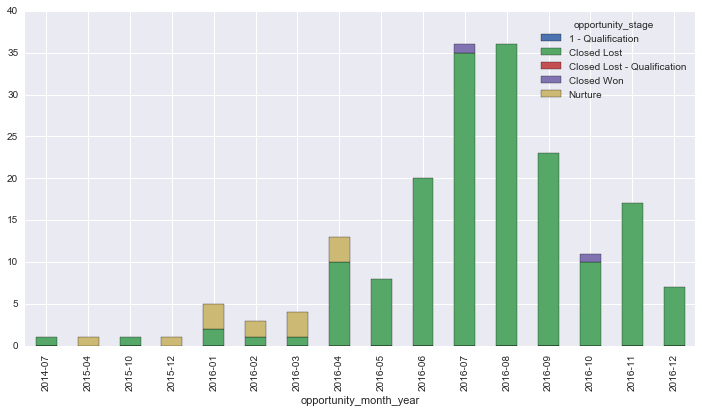

In [50]:
oppstage.loc[0].plot(kind='bar', stacked=True, figsize=(12,6));

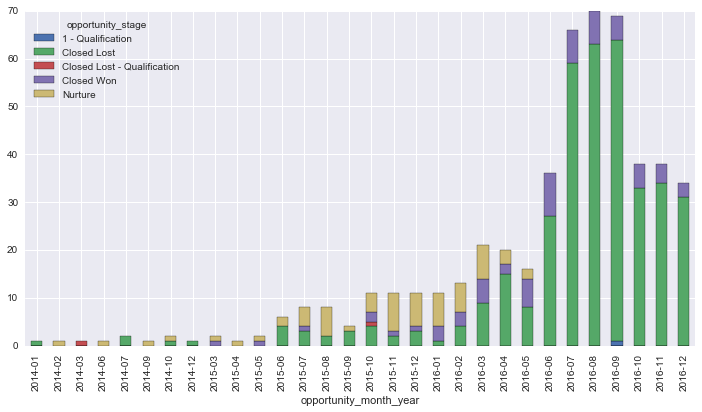

In [51]:
oppstage.loc[1].plot(kind='bar', stacked=True, figsize=(12,6));

In [52]:
# mql 1 vs 0 closed won as a percentage of total using apply
segDataGrouped = segmentData.groupby(['lead_mql_status','opportunity_month_year', 'opportunity_stage']).opportunity_stage.count()
oppstagepct = segDataGrouped.groupby(level=[0,1]).apply(lambda x: x / float(x.sum())); oppstagepct.head()

lead_mql_status  opportunity_month_year  opportunity_stage
0.0              2014-07                 Closed Lost          1.0
                 2015-04                 Nurture              1.0
                 2015-10                 Closed Lost          1.0
                 2015-12                 Nurture              1.0
                 2016-01                 Closed Lost          0.4
Name: opportunity_stage, dtype: float64

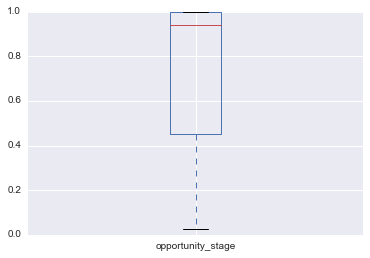

In [53]:
oppstagepct.loc[0].plot.box(by='opportunity_stage')

In [55]:
oppstage = segmentData[['lead_mql_status', 'opportunity_month_year', 'opportunity_stage']].pivot_table(
        index=['lead_mql_status', 'opportunity_month_year', 'opportunity_stage'], aggfunc=len, fill_value=0).reset_index()

In [56]:
oppstage.columns = ['lead_mql_status', 'opportunity_month_year', 'opportunity_stage', 'counts']

In [57]:
segmentData.opportunity_stage.value_counts()

Closed Lost                    545
Nurture                         77
Closed Won                      68
Closed Lost - Qualification      2
1 - Qualification                1
Name: opportunity_stage, dtype: int64